In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/food-allergy-analysis-Zenodo.csv')

df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,HISPANIC_FACTOR,MEDICAID_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,SESAME_ALG_START,SESAME_ALG_END,TREENUT_ALG_START,TREENUT_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,ASTHMA_START,ASTHMA_END
0,1,2006,S1,R0,E0,P1,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1,R0,E0,P0,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2006,S0,R0,E1,P0,True,0.010951,6.726899,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.127995,NaN
3,4,2004,S0,R4,E1,P0,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1,R0,E0,P0,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


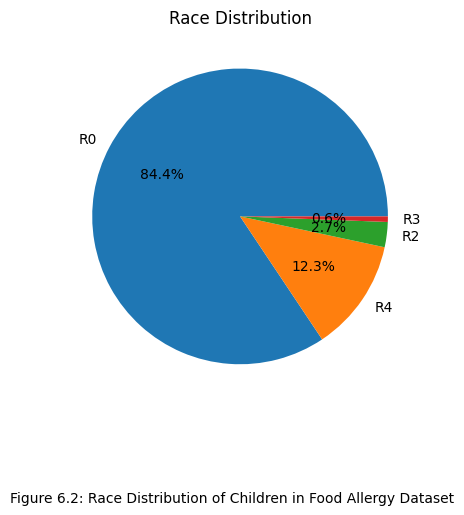

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a pie chart of the race distribution
race_counts = df['RACE_FACTOR'].value_counts()
labels = race_counts.index.tolist()
sizes = race_counts.values.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Race Distribution')

# Add label to the figure
plt.figtext(0.5, -0.1, 'Figure 6.2: Race Distribution of Children in Food Allergy Dataset', ha='center')

# Show the chart
plt.show()



In [ ]:
# Select the columns that contain the age when each illness started
illness_columns = [col for col in df.columns if col.endswith('_START')]

# Iterate over each row and check if the age when any illness started is not null
df['has_illness'] = df[illness_columns].notnull().any(axis=1)

# Convert the True/False values to Yes/No
df['has_illness'] = df['has_illness'].replace({True: 'Yes', False: 'No'})

# Print the first 5 rows of the updated DataFrame
df.head()


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,HISPANIC_FACTOR,MEDICAID_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,SESAME_ALG_END,TREENUT_ALG_START,TREENUT_ALG_END,WALNUT_ALG_START,WALNUT_ALG_END,PECAN_ALG_START,PECAN_ALG_END,ASTHMA_START,ASTHMA_END,has_illness
0,1,2006,S1,R0,E0,P1,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,2,1994,S1,R0,E0,P0,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,3,2006,S0,R0,E1,P0,True,0.010951,6.726899,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.127995,NaN,Yes
3,4,2004,S0,R4,E1,P0,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,5,2006,S1,R0,E0,P0,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


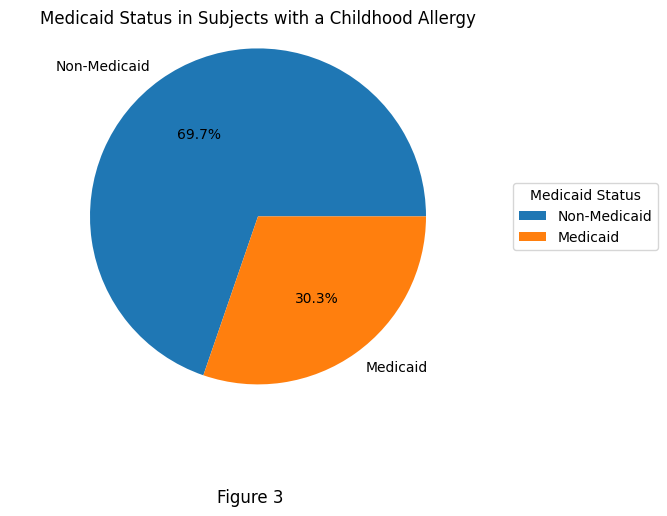

In [ ]:
import matplotlib.pyplot as plt

# select only the rows with has_illness equals to Yes
df_illness = df[df['has_illness'] == 'Yes']

# count the number of subjects with and without medicaid
medicaid_counts = df_illness['MEDICAID_FACTOR'].value_counts()

# plot the pie chart
labels = ['Non-Medicaid', 'Medicaid']
sizes = [medicaid_counts[0], medicaid_counts[1]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Medicaid Status in Subjects with a Childhood Allergy')
plt.axis('equal')
plt.text(0.5, -0.1, 'Figure 3', ha='center', fontsize=12, transform=plt.gcf().transFigure)

plt.legend(title='Medicaid Status', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()




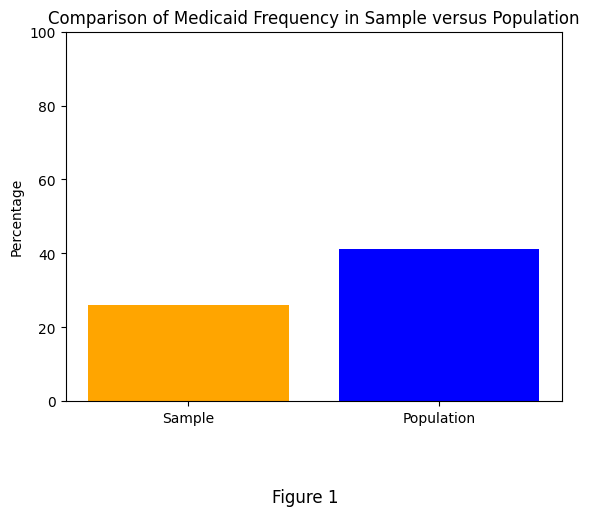

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of subjects in the sample with Medicaid
sample_medicaid_percent = (df[df['MEDICAID_FACTOR'] == 'P1'].shape[0] / df.shape[0]) * 100

# Calculate the percentage of children in the US with Medicaid
us_population = 73000000 # estimated number of US children
medicaid_population = 30000000 # estimated number of US children with Medicaid
medicaid_percent = (medicaid_population / us_population) * 100

# Create a bar chart to compare Medicaid frequency in the sample versus the population
labels = ['Sample', 'Population']
percentages = [sample_medicaid_percent, medicaid_percent]
colors = ['orange', 'blue']
plt.bar(labels, percentages, color=colors)
plt.title('Comparison of Medicaid Frequency in Sample versus Population')
plt.text(0.5, -0.1, 'Figure 1', ha='center', fontsize=12, transform=plt.gcf().transFigure)
plt.ylabel('Percentage')
plt.ylim([0, 100])
plt.show()



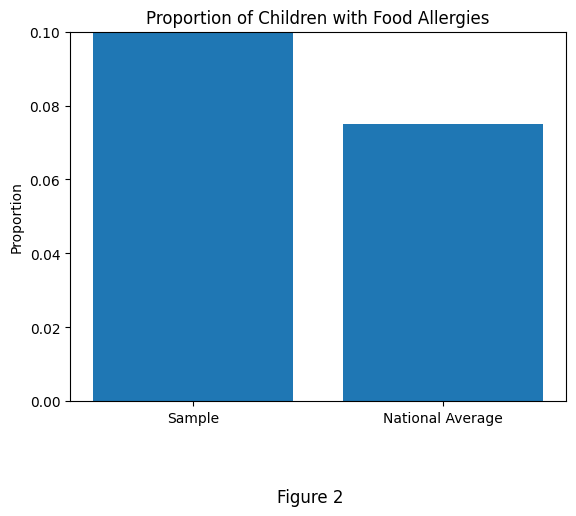

In [ ]:
# Calculate the proportion of children with a food allergy in the sample
sample_allergy_proportion = df['has_illness'].value_counts(normalize=True)['Yes']

# Calculate the national average proportion of children with a food allergy (source: CDC)
national_allergy_proportion = 0.075

# Plot a bar graph comparing the proportions
labels = ['Sample', 'National Average']
proportions = [sample_allergy_proportion, national_allergy_proportion]
plt.bar(labels, proportions)
plt.title('Proportion of Children with Food Allergies')
plt.text(0.5, -0.1, 'Figure 2', ha='center', fontsize=12, transform=plt.gcf().transFigure)
plt.ylabel('Proportion')
plt.ylim(0, 0.1)
plt.show()


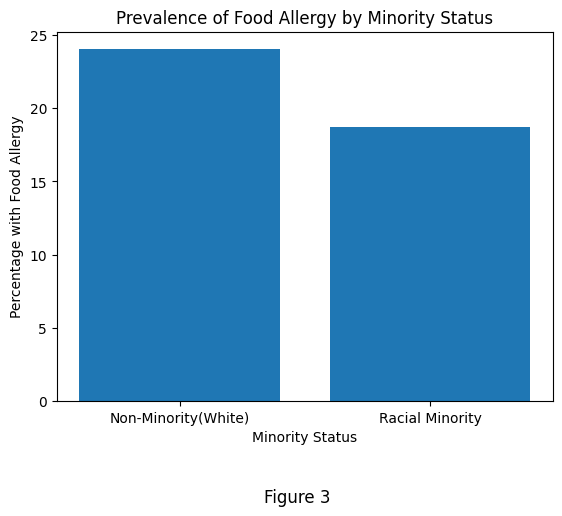

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a new column called minority_status
df['minority_status'] = df['RACE_FACTOR'].apply(lambda x: 'Racial Minority' if x != 'R0' else 'Non-Minority(White)')

# Select everyone who has an illness
df_illness = df[df['has_illness'] == 'Yes']

# Group by the minority status and count the number of individuals with an illness
illness_counts = df_illness.groupby('minority_status')['has_illness'].count()

# Group by the minority status and count the total number of individuals
total_counts = df.groupby('minority_status')['has_illness'].count()

# Calculate the percentage of individuals with an illness in each group
percentages = (illness_counts / total_counts) * 100

# Create a bar plot
plt.bar(percentages.index, percentages.values)
plt.title('Prevalence of Food Allergy by Minority Status')
plt.xlabel('Minority Status')
plt.ylabel('Percentage with Food Allergy')
plt.text(0.5, -0.1, 'Figure 3', ha='center', fontsize=12, transform=plt.gcf().transFigure)

plt.show()


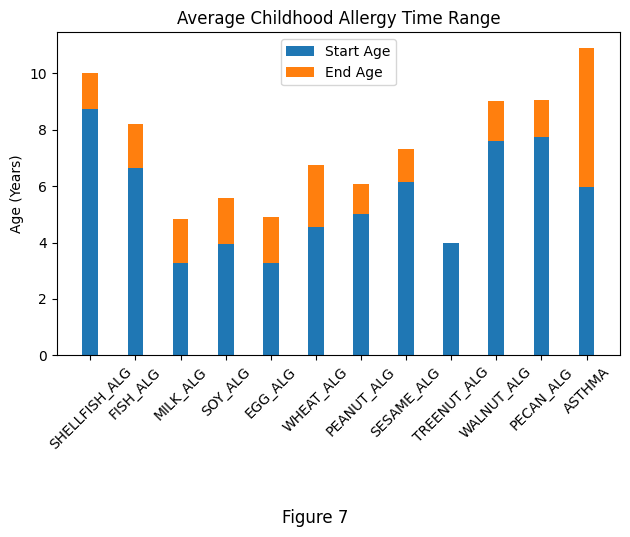

In [ ]:
import numpy as np

# select only the columns that contain the start and end ages of the 12 illnesses
illness_columns = [col for col in df.columns if col.endswith('_START') or col.endswith('_END')]

# replace all NA values with 0
df[illness_columns] = df[illness_columns].fillna(0)

# calculate the average start and end ages for each illness
start_ages = []
end_ages = []
for col in illness_columns:
    start_ages.append(df[df[col] != 0][col].mean())
    end_ages.append(df[df[col] != 0][col.replace('_START', '_END')].mean())

# plot the stacked bar graph
x_labels = [col.replace('_START', '') for col in illness_columns[::2]]
x = np.arange(len(x_labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, start_ages[::2], width, label='Start Age')
rects2 = ax.bar(x, end_ages[::2], width, bottom=start_ages[::2], label='End Age')
plt.xticks(rotation=45)
ax.set_ylabel('Age (Years)')
plt.text(0.5, -0.1, 'Figure 7', ha='center', fontsize=12, transform=plt.gcf().transFigure)
plt.title('Average Childhood Allergy Time Range')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()
fig.tight_layout()
plt.show()


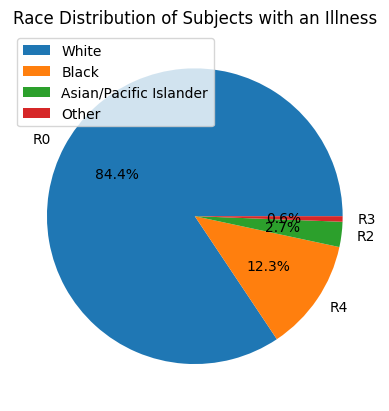

In [ ]:
# Select the rows where RACE_FACTOR is not NA and has_illness is Yes
df_race = df[df['RACE_FACTOR'].notna() & (df['has_illness'] == 'Yes')]

# Count the number of subjects in each race category
race_counts = df_race['RACE_FACTOR'].value_counts()

# Create a pie chart of the race distribution of subjects with an illness
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%')

# Add a legend
legend_labels = ['White', 'Black', 'Asian/Pacific Islander', 'Other', 'Unknown']
plt.legend(legend_labels)

plt.title('Race Distribution of Subjects with an Illness')
plt.show()


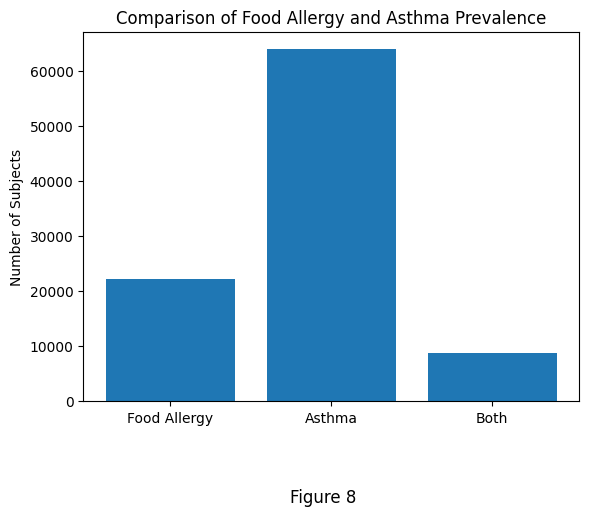

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a new column indicating whether a subject has a food allergy
food_allergies = ['SHELLFISH_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START', 'WALNUT_ALG_START', 'PECAN_ALG_START', 'MILK_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START', 'FISH_ALG_START', 'SOY_ALG_START', 'PEANUT_ALG_START']
df['has_food_allergy'] = df[food_allergies].notnull().any(axis=1)
df['has_food_allergy'] = df['has_food_allergy'].replace({True: 'Yes', False: 'No'})

# Create a new column indicating whether a subject has asthma
df['has_asthma'] = df['ASTHMA_START'].notnull().replace({True: 'Yes', False: 'No'})

# Create a bar graph of the number of subjects with food allergies, asthma, or both
food_allergy_count = df[df['has_food_allergy'] == 'Yes'].shape[0]
asthma_count = df[df['has_asthma'] == 'Yes'].shape[0]
both_count = df[(df['has_food_allergy'] == 'Yes') & (df['has_asthma'] == 'Yes')].shape[0]

labels = ['Food Allergy', 'Asthma', 'Both']
plt.text(0.5, -0.1, 'Figure 8', ha='center', fontsize=12, transform=plt.gcf().transFigure)

sizes = [food_allergy_count, asthma_count, both_count]
plt.bar(labels, sizes)
plt.title('Comparison of Food Allergy and Asthma Prevalence')
plt.ylabel('Number of Subjects')
plt.show()


In [ ]:
# Select rows where peanut allergy is not NaN and hispanic status is not NaN
df_peanut_hisp = df[['PEANUT_ALG_START', 'HISPANIC_FACTOR']].dropna()

# Create contingency table
contingency_table = pd.crosstab(df_peanut_hisp['PEANUT_ALG_START'], df_peanut_hisp['HISPANIC_FACTOR'])

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant association between peanut allergy and hispanic status.")
else:
    print("There is no significant association between peanut allergy and hispanic status.")




There is a significant association between peanut allergy and hispanic status.


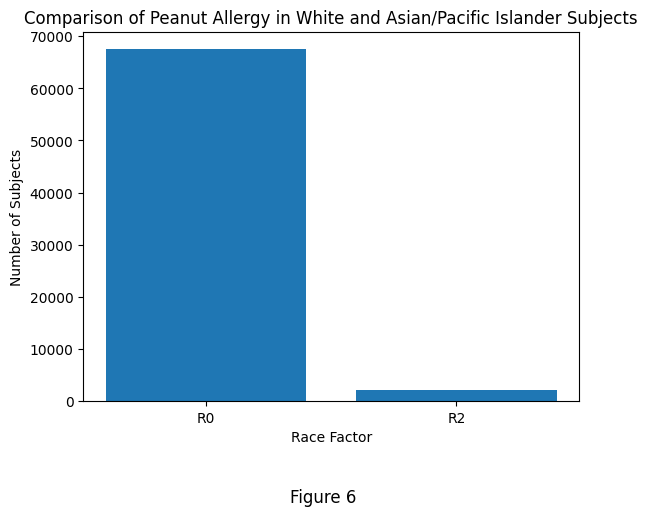

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Select rows where RACE_FACTOR is R0 or R2 and has_illness is Yes and peanut allergy is Yes
df_peanut_allergy = df[(df['RACE_FACTOR'].isin(['R0', 'R2'])) & (df['has_illness'] == 'Yes') & (df['PEANUT_ALG_START'] != 'NA')]

# Count the number of subjects in each race category
race_counts = df_peanut_allergy['RACE_FACTOR'].value_counts()

# Create a bar chart of the race distribution of subjects with a peanut allergy
plt.bar(race_counts.index, race_counts.values)
plt.text(0.5, -0.1, 'Figure 6', ha='center', fontsize=12, transform=plt.gcf().transFigure)
plt.title('Comparison of Peanut Allergy in White and Asian/Pacific Islander Subjects')
plt.xlabel('Race Factor')
plt.ylabel('Number of Subjects')
plt.show()



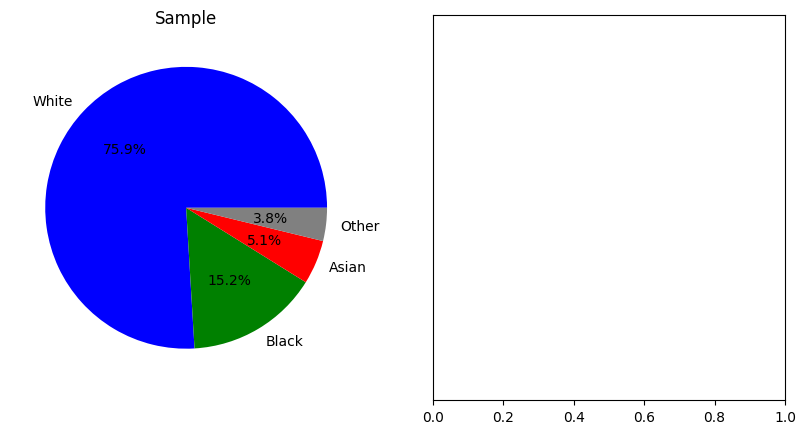

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the pie chart
labels = ['White', 'Black', 'Asian', 'Other']
colors = ['blue', 'green', 'red', 'gray']
race_counts_sample = [60, 12, 4, 3]

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)



# Create the pie chart for the sample
axs[0].pie(race_counts_sample, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Sample')


plt.show()




